In [1]:
!pip3 install torch torchvision
!pip install ipdb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 25.4 MB/s eta 0:00:00


In [2]:
import numpy as np
import torch, torchvision
import torch.nn as nn
import torch.nn.functional as F
import ipdb
from torchvision import datasets
import random
import matplotlib.pyplot as plt
from torchvision import transforms

DEVICE = torch.device('cuda')

In [3]:
train_dataset = datasets.CIFAR10(root = "/", train = True, download = True, transform = transforms.ToTensor())
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size = 64, shuffle = True)

100%|██████████| 170498071/170498071 [00:03<00:00, 48713505.61it/s]


Extracting /cifar-10-python.tar.gz to /


十种分类: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']  图片数量: 50000
图片矩阵的形状是: torch.Size([3, 32, 32])
对应的分类是: cat


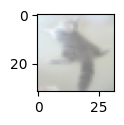

In [4]:
print('十种分类:', train_dataset.classes, ' 图片数量:', len(train_dataset))
img, label = train_dataset[random.randint(0,len(train_dataset))] ## 随机取一张图片
print('图片矩阵的形状是:', img.shape) # 3个RGB维度 * 32 长 * 32 宽
print('对应的分类是:', train_dataset.classes[label])

## 图片打印出来看看
img0 = torchvision.utils.make_grid(img)
img1 = img0 / 2 + 0.5
img2 = img1.numpy()
img3 = np.transpose(img2, (1,2,0))
plt.figure(figsize=(1,1))
plt.imshow(img3)

In [5]:
class net(nn.Module):
  def __init__(self):
    super(net, self).__init__()

    self.conv = nn.Conv2d(in_channels=3, out_channels=6, kernel_size = 5, stride = 1) # 卷积层
    self.pool = nn.MaxPool2d(kernel_size = 4, stride = 4) # 池化层
    self.relu = nn.ReLU() # 激活函数
    self.dense = nn.Linear(294, 10) # 全链接层

  def forward(self, x):
    # x 初始形状为 64,3,32,32 一批的样本数,RGB三通道,长,宽
    # ipdb.set_trace() 打开后可以debug调试
    x = self.conv(x) # 经过卷积，x 形状为 64,6,28,28  样本数,卷积后的通道数、长、宽
    x = self.relu(x) # 激活函数的数值处理，x形状不变 64,6,28,28
    x = self.pool(x) # 经过池化，x形状为 64,6,7,7  样本数,卷积后通道数,池化后长、宽
    x = x.view(x.size(0), -1)   # 将单个的样本，打平到一维数组，变为 64,294  样本数，单样本的特征数量
    x = self.dense(x) # 通过全连接，将单样本特征映射到10个分类上，变为 64,10  样本数，单样本在每个分类上的概率
    return x

In [6]:
model = net().to(DEVICE)  # 模型
criterion = nn.CrossEntropyLoss() # 损失函数
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-1) # 优化器

In [7]:
for i in range(3):
  temp_loss = []
  for (x, y) in train_loader:
    x, y = x.float().to(DEVICE), y.to(DEVICE)
    outputs = model(x)
    loss = criterion(outputs, y)
    temp_loss.append(loss.item())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  print("Loss at {}th epoch: {}".format(i, np.mean(temp_loss)))

Loss at 0th epoch: 2.3852063609511043
Loss at 1th epoch: 2.311342030230081
Loss at 2th epoch: 2.3107877853886247
